# Hierarchical Clustering


## Prerequisites


In [126]:
import pandas as pd
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.2f}".format

In [127]:
master_df_scaled = pd.read_pickle("../data/processed/master_df_scaled.pkl")

In [128]:
selected_features = [
    "naics1_occ1",
    "naics1_occ2",
    "naics1_occ3",
    "naics1_occ4",
    "naics1_occ5",
    "naics2-5_occ1-3",
    "naics2-5_occ4-5",
    "naics1_est",
    "naics2-5_est",
    "naics1_ap",
    "naics2-5_ap",
    "newest_gdp",
]
result_df = master_df_scaled.loc[:, selected_features]

## Clustering


### Identifying n-clusters


#### Methods


In [129]:
# Dendrogram Method
def dendrogram(df):
    plt.figure(figsize=(10, 7))

    dendrogram = sch.dendrogram(sch.linkage(df, method="ward"))
    plt.title("Dendrogram")
    plt.xlabel("Euclidean Distance")
    plt.ylabel("Industries")
    plt.show()

In [130]:
def silhouetteScore(df, max_it):
    for i in range(2, max_it):
        hierarchy = AgglomerativeClustering(
            n_clusters=i, metric="euclidean", linkage="ward"
        )

        clusters = hierarchy.fit_predict(df)
        print(
            f"The score for {i} Cluster for Hierachical is {silhouette_score(df, clusters)}"
        )

#### Visualise


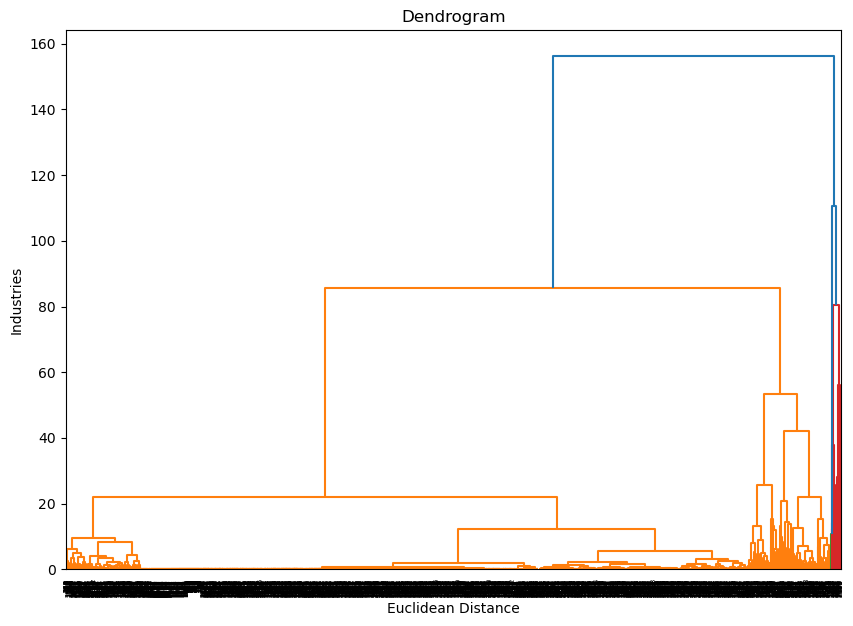

In [131]:
dendrogram(result_df)

In [132]:
silhouetteScore(result_df, 10)

The score for 2 Cluster for Hierachical is 0.9303462919274745
The score for 3 Cluster for Hierachical is 0.9250898188157921
The score for 4 Cluster for Hierachical is 0.7843614076792743
The score for 5 Cluster for Hierachical is 0.786651288497874
The score for 6 Cluster for Hierachical is 0.787477647577691
The score for 7 Cluster for Hierachical is 0.7911752956889394
The score for 8 Cluster for Hierachical is 0.791315585388516
The score for 9 Cluster for Hierachical is 0.7853344955136297


In [133]:
number_of_clusters = 4

### Applying Hierarchical Clustering


In [134]:
hierarchy = AgglomerativeClustering(
    n_clusters=number_of_clusters, metric="euclidean", linkage="ward"
)
hierarchy.fit(result_df)

result_df["Cluster_ID"] = hierarchy.labels_

## Analyse


In [135]:
print(result_df["Cluster_ID"].value_counts())

Cluster_ID
3    2720
1     331
0      36
2       2
Name: count, dtype: int64


In [136]:
cluster_counts = result_df["Cluster_ID"].value_counts().sort_values(ascending=False)

ordered_labels = {
    old_label: new_label for new_label, old_label in enumerate(cluster_counts.index)
}

result_df["Cluster_ID"] = result_df["Cluster_ID"].map(ordered_labels)

In [137]:
print(result_df["Cluster_ID"].value_counts())

Cluster_ID
0    2720
1     331
2      36
3       2
Name: count, dtype: int64


<Axes: xlabel='Cluster_ID'>

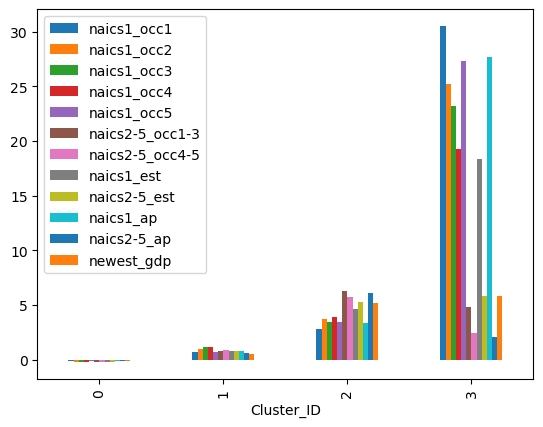

In [138]:
result_df.groupby("Cluster_ID")[selected_features].mean().plot(legend=True, kind="bar")

In [139]:
print(result_df[result_df["Cluster_ID"] == 2].head(5))
print(result_df[result_df["Cluster_ID"] == 3].head(5))

      naics1_occ1  naics1_occ2  naics1_occ3  naics1_occ4  naics1_occ5  naics2-5_occ1-3  naics2-5_occ4-5  naics1_est  naics2-5_est  naics1_ap  naics2-5_ap  newest_gdp  Cluster_ID
FIPS                                                                                                                                                                             
1125         6.09         6.76        11.15         5.44         5.46             0.02            -0.16        1.64          0.30       4.67        -0.06        0.45           2
4013         0.81         1.85         2.17         1.01         1.90            10.04             7.77        8.14         11.19       1.90         8.24        9.28           2
6001        -0.05         0.04         0.07        -0.10        -0.07             5.58             1.58        2.30          6.65       0.09         9.94        8.37           2
6037         1.55         3.43         4.37         1.22         1.19            19.33             7.07       

In [140]:
pd.to_pickle(result_df, "../data/processed/result_hierarchy_df.pkl")